In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.layers as kl
import tensorflow.keras.models as km
import tensorflow.keras.utils as ku

In [2]:
#dataset
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize to 0 to 1 range
x_train=x_train/255.0
x_test=x_test/255.0
print(x_train.shape)
print(x_test.shape)

#reshaping the size
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [3]:
#model
inputs=kl.Input(shape=(28,28,1))
c=kl.Conv2D(32,(3,3),padding="valid",activation=tf.nn.relu)(inputs)
m=kl.MaxPool2D((2,2),(2,2))(c)
d=kl.Dropout(0.5)(m)
c=kl.Conv2D(64,(3,3),padding="valid",activation=tf.nn.relu)(d)
m=kl.MaxPool2D((2,2),(2,2))(c)
f=kl.Flatten()(m)

#output layyer with 10 classes
outputs=kl.Dense(10,activation=tf.nn.softmax)(f)
model=km.Model(inputs,outputs)
model.summary()
            

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxP

In [4]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test loss: ",test_loss)
print("Test accuracy: ",test_acc)

Epoch 1/3
60000/60000 [==============================] - 57s 957us/sample - loss: 0.2126 - acc: 0.9340
Epoch 2/3
60000/60000 [==============================] - 55s 916us/sample - loss: 0.0763 - acc: 0.9772
Epoch 3/3
10000/10000 [==============================] - 3s 296us/sample - loss: 0.0407 - acc: 0.9873
Test loss:  0.04066422305619344
Test accuracy:  0.9873


In [9]:
prediction = model.predict(x_test[1205:1206])
prediction = prediction[0]
print('Prediction :',prediction)
print('Thresholded output',(prediction>0.5)*1)


Prediction : [1.0322019e-11 2.9452196e-10 4.5906958e-09 9.9999976e-01 9.8599592e-12
 2.7245910e-09 1.2473395e-13 4.0004120e-09 2.9178624e-09 2.5545808e-07]
Thresholded output [0 0 0 1 0 0 0 0 0 0]


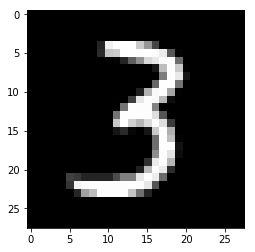

In [10]:
# Plotting the value at 1205
plt.imshow(x_test[1205:1206].reshape(28,28),cmap='gray')
plt.show()

In [11]:
prediction = model.predict(x_test[1550:1551])
prediction = prediction[0]
print('Prediction :',prediction)
print('Thresholded output',(prediction>0.5)*1)


Prediction : [3.0644713e-07 2.8261013e-08 1.6732283e-08 3.8487593e-05 9.4703626e-07
 9.9745685e-01 1.6238449e-05 6.5903691e-06 2.0516736e-03 4.2897361e-04]
Thresholded output [0 0 0 0 0 1 0 0 0 0]


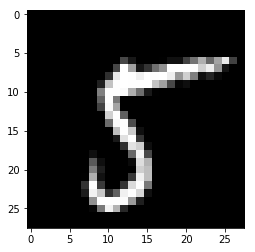

In [12]:
# Plotting the value at 1550
plt.imshow(x_test[1550:1551].reshape(28,28),cmap='gray')
plt.show()

# INPUT

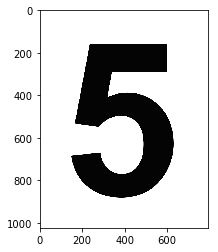

In [24]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('5.jpg', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("on")
plt.show()

# Greyscale Conversion


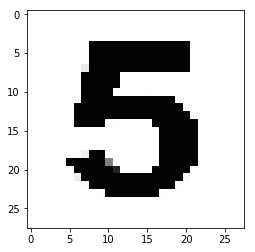

In [25]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('5.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("on")
plt.show()

In [23]:
prediction = model.predict(image_resized.reshape(784,1))
prediction = prediction[0]
print('Prediction :',prediction)
print('Thresholded output',(prediction>0.5)*1)


ValueError: Error when checking input: expected input_1 to have 4 dimensions, but got array with shape (784, 1)